In [1]:
import models
import datasets
import os
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet_v2 import preprocess_input as preprocess_inputV2

In [2]:
attributes_dir = os.path.join("../data/multi_data/tree_attributes.csv")
images_dir = os.path.join("../data/multi_data/tree_images")

In [3]:
# load CSV data
df=datasets.load_tree_attributes(attributes_dir)
# load image data
images=datasets.load_tree_images(df, images_dir)

In [4]:
# preprocess image data to fit resnet model
image = preprocess_input(images)

In [5]:
# Divided data into a training set and a test set in a ratio of 9:1 randomly
from sklearn.model_selection import train_test_split
split = train_test_split(df, image, test_size=0.1, random_state=42)
(trainAttrX, testAttrX, trainImagesX, testImagesX) = split
trainY= trainAttrX["TPO"]
testY = testAttrX["TPO"]
trainAttrX=trainAttrX.drop("TPO", axis=1).drop("ID", axis=1)
testAttrX=testAttrX.drop("TPO", axis=1).drop("ID", axis=1)
x_trainAttr = trainAttrX.to_numpy()
x_trainAttr= x_trainAttr.reshape(len(trainAttrX), 1, 11)
print("shape of train:{}".format(x_trainAttr.shape))
x_testAttr = testAttrX.to_numpy()
x_testAttr = x_testAttr.reshape(len(testAttrX), 1, 11)
print("shape of test:{}".format(x_testAttr.shape))

shape of train:(73551, 1, 11)
shape of test:(8173, 1, 11)


In [6]:
# create mlp resnet50 mixed model
lstmResnet50 = models.create_lstmresnet50(1, 11, 124,124,3, optimizer='adam', 
                                         loss='binary_crossentropy', metrics=['accuracy'])

Train Model
Create Model
Cross Validation
Iteration= 1
Epoch 1/15
1839/1839 [==============================] - 131s 67ms/step - loss: 0.5586 - accuracy: 0.7345 - val_loss: 0.4696 - val_accuracy: 0.8023
Epoch 2/15
1839/1839 [==============================] - 120s 65ms/step - loss: 0.4131 - accuracy: 0.8304 - val_loss: 0.3887 - val_accuracy: 0.8386
Epoch 3/15
1839/1839 [==============================] - 120s 65ms/step - loss: 0.3425 - accuracy: 0.8624 - val_loss: 0.3482 - val_accuracy: 0.8537
Epoch 4/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.2751 - accuracy: 0.8955 - val_loss: 0.3367 - val_accuracy: 0.8552
Epoch 5/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.2163 - accuracy: 0.9221 - val_loss: 0.3357 - val_accuracy: 0.8573
Epoch 6/15
1839/1839 [==============================] - 120s 65ms/step - loss: 0.1648 - accuracy: 0.9453 - val_loss: 0.3611 - val_accuracy: 0.8572
Epoch 7/15
1839/1839 [==============================] - 120s 65

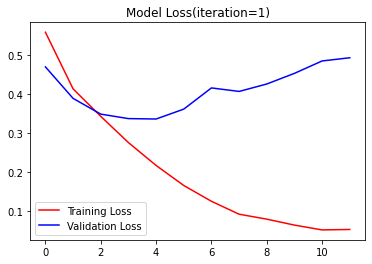

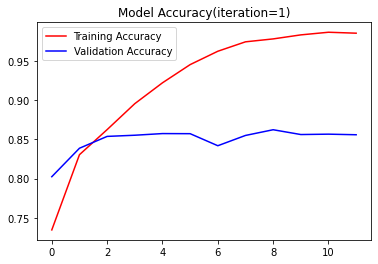

Iteration= 2
Epoch 1/15
1839/1839 [==============================] - 120s 65ms/step - loss: 0.1574 - accuracy: 0.9486 - val_loss: 0.3680 - val_accuracy: 0.8564
Epoch 2/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.1236 - accuracy: 0.9616 - val_loss: 0.3825 - val_accuracy: 0.8541
Epoch 3/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0930 - accuracy: 0.9720 - val_loss: 0.4042 - val_accuracy: 0.8564
Epoch 4/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0715 - accuracy: 0.9802 - val_loss: 0.4346 - val_accuracy: 0.8596
Epoch 5/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0571 - accuracy: 0.9843 - val_loss: 0.4541 - val_accuracy: 0.8617
Epoch 6/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0551 - accuracy: 0.9851 - val_loss: 0.4964 - val_accuracy: 0.8500
Epoch 7/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0554 - accuracy: 0.9842 

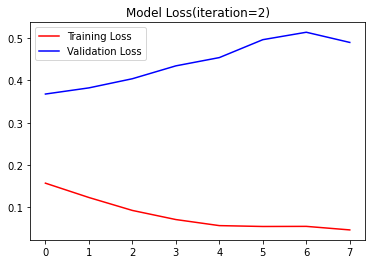

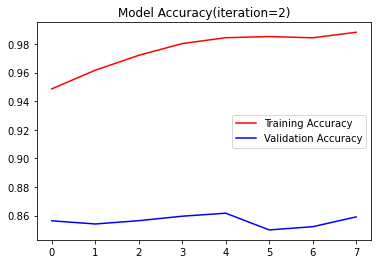

Iteration= 3
Epoch 1/15
1839/1839 [==============================] - 120s 65ms/step - loss: 0.1234 - accuracy: 0.9612 - val_loss: 0.3701 - val_accuracy: 0.8632
Epoch 2/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0978 - accuracy: 0.9714 - val_loss: 0.4094 - val_accuracy: 0.8576
Epoch 3/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0791 - accuracy: 0.9778 - val_loss: 0.4276 - val_accuracy: 0.8543
Epoch 4/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0590 - accuracy: 0.9841 - val_loss: 0.5008 - val_accuracy: 0.8376
Epoch 5/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0542 - accuracy: 0.9850 - val_loss: 0.4879 - val_accuracy: 0.8528
Epoch 6/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0601 - accuracy: 0.9831 - val_loss: 0.4687 - val_accuracy: 0.8587
Epoch 7/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0408 - accuracy: 0.9893 

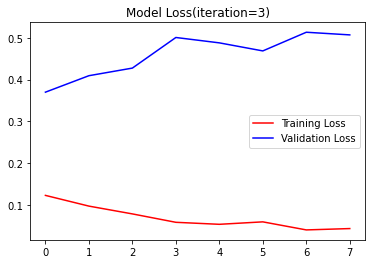

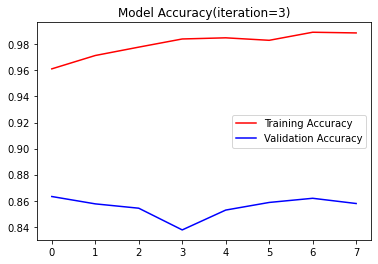

Iteration= 4
Epoch 1/15
1839/1839 [==============================] - 120s 65ms/step - loss: 0.0931 - accuracy: 0.9726 - val_loss: 0.4163 - val_accuracy: 0.8597
Epoch 2/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0721 - accuracy: 0.9796 - val_loss: 0.4246 - val_accuracy: 0.8652
Epoch 3/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0581 - accuracy: 0.9839 - val_loss: 0.4677 - val_accuracy: 0.8546
Epoch 4/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0527 - accuracy: 0.9855 - val_loss: 0.4666 - val_accuracy: 0.8557
Epoch 5/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0457 - accuracy: 0.9873 - val_loss: 0.4909 - val_accuracy: 0.8533
Epoch 6/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0435 - accuracy: 0.9876 - val_loss: 0.5021 - val_accuracy: 0.8543
Epoch 7/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0379 - accuracy: 0.9900 

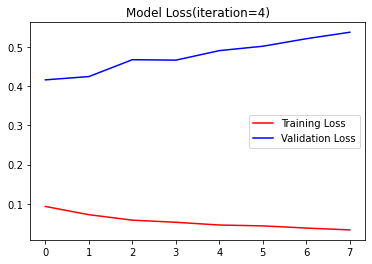

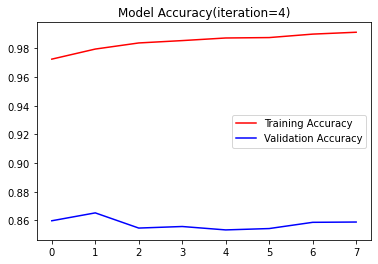

Iteration= 5
Epoch 1/15
1839/1839 [==============================] - 120s 65ms/step - loss: 0.0831 - accuracy: 0.9751 - val_loss: 0.4329 - val_accuracy: 0.8549
Epoch 2/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0687 - accuracy: 0.9809 - val_loss: 0.4409 - val_accuracy: 0.8587
Epoch 3/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0579 - accuracy: 0.9846 - val_loss: 0.4642 - val_accuracy: 0.8566
Epoch 4/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0512 - accuracy: 0.9863 - val_loss: 0.4791 - val_accuracy: 0.8524
Epoch 5/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0416 - accuracy: 0.9889 - val_loss: 0.5118 - val_accuracy: 0.8525
Epoch 6/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0358 - accuracy: 0.9905 - val_loss: 0.5144 - val_accuracy: 0.8569
Epoch 7/15
1839/1839 [==============================] - 119s 65ms/step - loss: 0.0335 - accuracy: 0.9909 

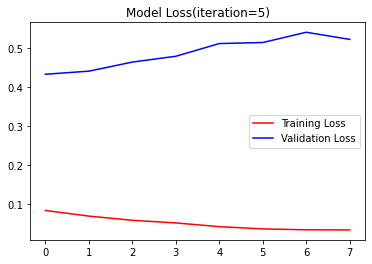

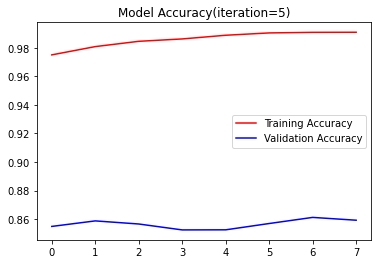

CV_Accuracy:85.50%(+/- 0.29%)
 CV_Loss:45.60%(+/- 2.78%)

256/256 [==============================] - 10s 40ms/step - loss: 0.4142 - accuracy: 0.8615
evaluate accuracy: 86.15%
 evaluate loss: 41.42%



In [7]:
models.train_multimodel_with_cv(x_trainAttr, trainImagesX, x_testAttr, testImagesX, trainY, testY,
                               lstmResnet50, cross_validation=5, epochs=15, batch_size=32) 

<Figure size 432x288 with 0 Axes>

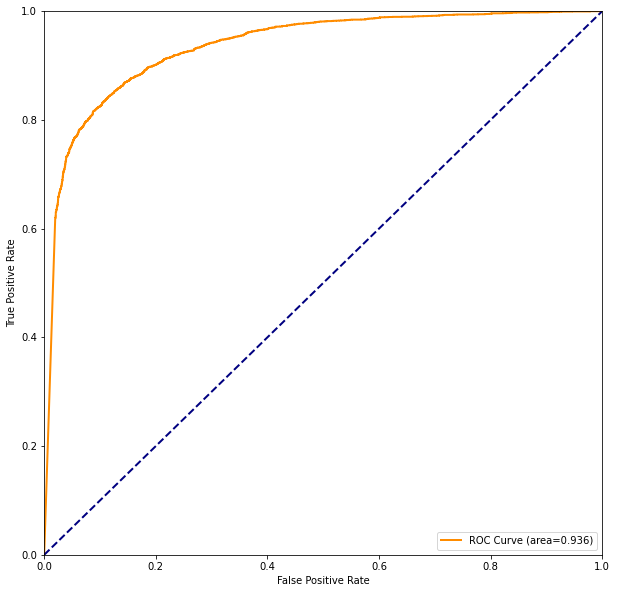

In [8]:
y_prob = lstmResnet50.predict(x=[x_testAttr,testImagesX])
models.auc_curve(testY, y_prob)